

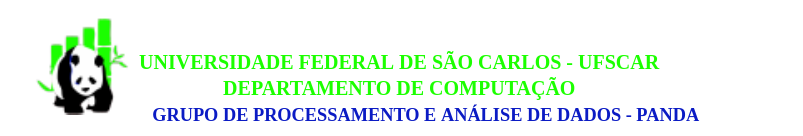


#**Modelagem ARIMA para Séries Temporais**

O ARIMA, que significa "Autoregressive Integrated Moving Average", é um dos modelos mais populares para prever e analisar séries temporais. O ARIMA combina modelos autoregressivos (AR), modelos de médias móveis (MA) e diferenciação para tornar a série estacionária (I).

## **Passos para modelagem**


**Estacionariedade:** Verifique se a série temporal é estacionária. Se não for, diferencie-a até que se torne estacionária. O número de diferenciações é representado pelo termo 'd' em ARIMA.

**Identificação:** Identifique os termos AR (p) e MA (q) usando funções de autocorrelação (ACF) e autocorrelação parcial (PACF).

**Estimação:** Estime os parâmetros do modelo ARIMA usando técnicas de otimização.

**Verificação:** Verifique se os resíduos do modelo são brancos (sem autocorrelação) e seguem uma distribuição normal.

**Previsão:** Use o modelo para fazer previsões.

## **Exemplo de código**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.datasets import macrodata

In [ ]:
# Carregar o conjunto de dados
data = sm.datasets.macrodata.load_pandas().data
series = data['realgdp']
series

0       2710.349
1       2778.801
2       2775.488
3       2785.204
4       2847.699
         ...    
198    13324.600
199    13141.920
200    12925.410
201    12901.504
202    12990.341
Name: realgdp, Length: 203, dtype: float64

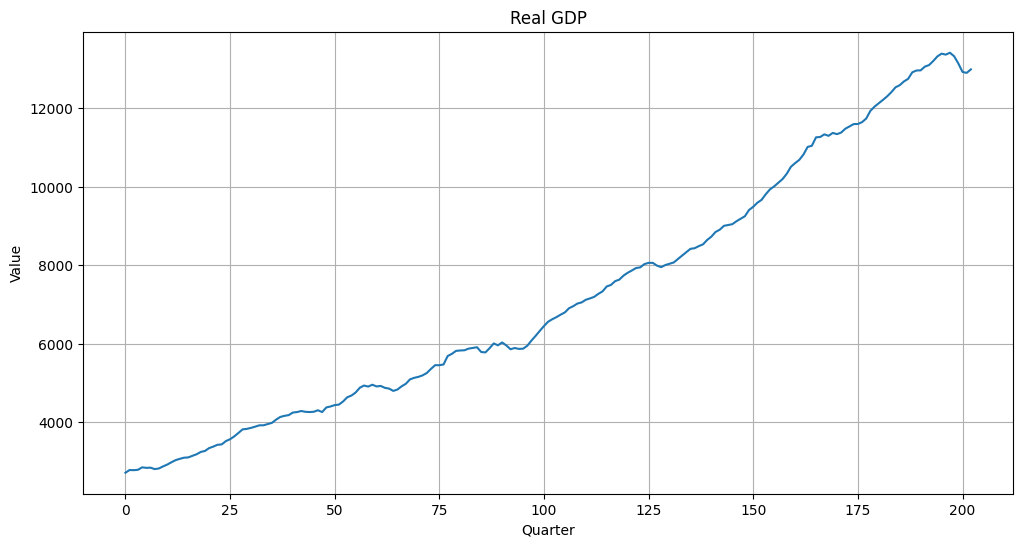

In [ ]:
# Visualizar a série
plt.figure(figsize=(12, 6))
plt.plot(series)
plt.title('Real GDP')
plt.xlabel('Quarter')
plt.ylabel('Value')
plt.grid(True)
plt.show()

## **Teste de estacionariedade e tranformação por diferenciação**

In [ ]:
# Realizar o teste de Dickey-Fuller aumentado
result = adfuller(series)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print("A série é estacionária.")
else:
    print("A série não é estacionária.")

ADF Statistic: 1.7504627967647144
p-value: 0.9982455372335032
Critical Values: {'1%': -3.4652439354133255, '5%': -2.8768752281673717, '10%': -2.574944653739612}
A série não é estacionária.


In [ ]:
series_diff = series.diff().dropna()

In [ ]:
# Realizar o teste de Dickey-Fuller aumentado
result = adfuller(series_diff)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print("A série é estacionária.")
else:
    print("A série não é estacionária.")

ADF Statistic: -6.305695561658106
p-value: 3.327882187668224e-08
Critical Values: {'1%': -3.463476079125, '5%': -2.876102355, '10%': -2.574532225}
A série é estacionária.


In [ ]:
# Dividindo os dados em treino e teste
train = series_diff[:-10]
test = series_diff[-10:]

## **Definição de paramêtros e Autocorrelação**

Determinar os parâmetros p, d, e q para um modelo ARIMA é uma etapa crucial. Esses parâmetros representam:
*   **p:** ordem do componente autoregressivo (AR).
*   **d:** ordem da diferenciação.
*   **q:** ordem do componente de média móvel (MA).
A determinação desses parâmetros pode ser feita através da análise dos gráficos de Autocorrelação (ACF) e Autocorrelação Parcial (PACF).


**ACF (Autocorrelation Function):**
Mostra a correlação entre a série e sua defasagem.
Um declínio gradual seguido por um corte brusco após
q defasagens sugere um modelo MA de ordem q.<br>

**PACF (Partial Autocorrelation Function):**
Mostra a correlação entre a série e sua defasagem, mas após eliminar as variações já explicadas pelas comparações intermediárias.
Um declínio gradual seguido por um corte brusco após
p defasagens sugere um modelo AR de ordem p.<br>

Para determinar d, a ordem da diferenciação:
*   Se a série temporal é estacionária, d=0.
*   Se a série tem uma tendência, então diferencie uma vez e teste novamente. Se ainda não for estacionária, diferencie novamente. O valor de d é o número de diferenciações necessárias para tornar a série estacionária.

**Passos para determinar p e q usando ACF e PACF:**
*   Plote o gráfico ACF e observe onde o gráfico cruza o eixo x (linha de base). O ponto onde cruza é o valor de q (para o componente MA).
*   Plote o gráfico PACF e observe onde o gráfico cruza o eixo x. O ponto onde cruza é o valor de p (para o componente AR).

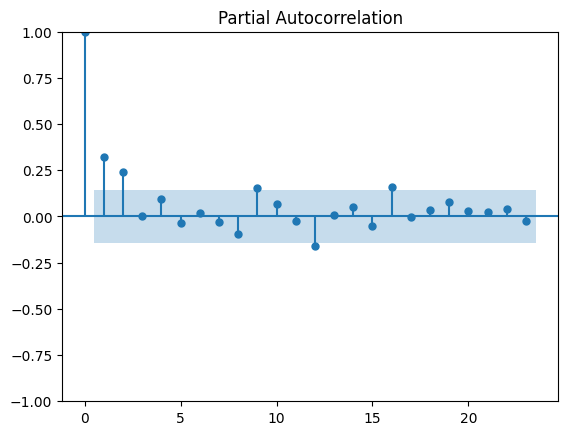

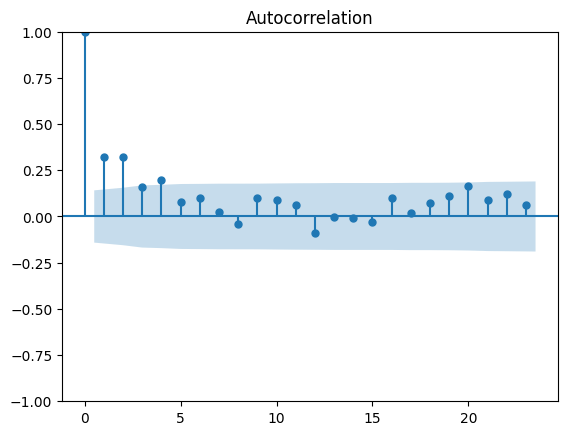

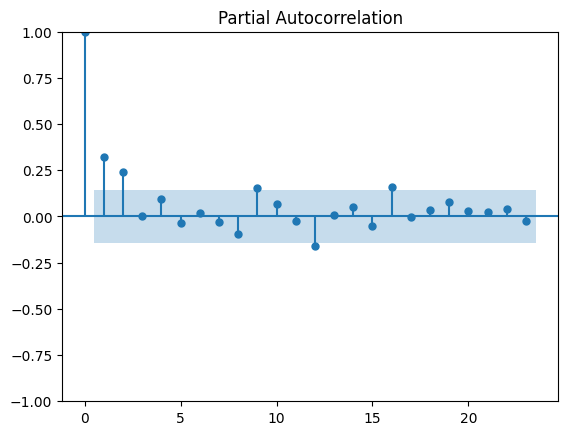

In [ ]:
# Determinando os parâmetros p, d, q usando ACF e PACF
plot_acf(train)
plot_pacf(train)

### **AutoARIMA**

In [ ]:
# Aplicar o modelo ARIMA
# Suponha que, com base nos gráficos ACF e PACF, determinamos p=2 e q=3
model = ARIMA(series_diff, order=(2,0,3))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
!pip install pmdarima

In [ ]:
import statsmodels.api as sm
from pmdarima import auto_arima

In [ ]:
# Usar auto_arima para encontrar o melhor modelo ARIMA
model = auto_arima(series, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

# Sumário do modelo
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=2252.986, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=2215.326, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=2198.399, Time=0.25 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2250.987, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=2196.556, Time=0.34 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=2202.249, Time=0.93 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=2194.624, Time=0.17 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=2196.453, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=2200.302, Time=0.26 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=2185.834, Time=0.21 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=2186.249, T

## **Modelo final de previsão**

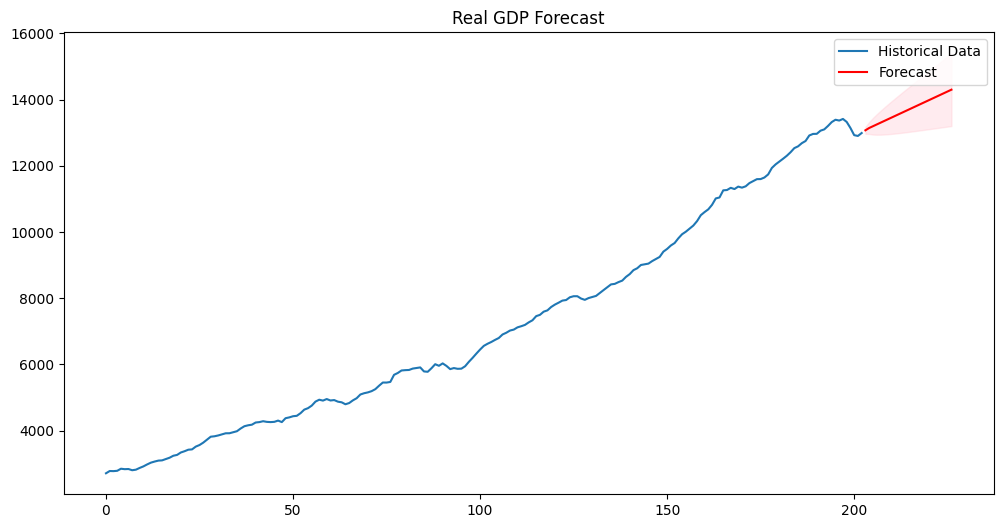

In [ ]:
# Previsões
n_periods = 24
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Plotar as previsões
plt.figure(figsize=(12, 6))
plt.plot(series.index, series, label='Historical Data')
plt.plot(np.arange(len(series), len(series) + n_periods), forecast, color='red', label='Forecast')
plt.fill_between(np.arange(len(series), len(series) + n_periods), conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('Real GDP Forecast')
plt.show()

# **Modelos de Estado-Espaço**

## **Conceituação e aplicação**

**Conceito Básico:**
Um modelo de estado-espaço descreve a evolução de um sistema ao longo do tempo em termos de:
*   **Estado:** Um vetor que resume toda a informação passada relevante para prever o futuro da série.
*   **Equação de Transição de Estado:** Descreve como o estado evolui ao longo do tempo.
*   **Equação de Observação:** Relaciona o estado atual a uma observação atual (por exemplo, uma medição ou um ponto de dados).

**1. Séries Temporais Multivariadas:**
Enquanto muitos modelos de séries temporais focam em uma única variável ao longo do tempo, os modelos de estado-espaço podem facilmente acomodar múltiplas séries temporais. Isso é útil quando se tem várias séries que interagem entre si ou quando se quer modelar a relação entre as mesmas.

**2. Intervenções e Mudanças Estruturais:**
Tem a capacidade de modelar intervenções (como um evento específico que afeta a série) e mudanças estruturais (quando a natureza subjacente da série muda ao longo do tempo).

**4. Flexibilidade:**
Os modelos de estado-espaço são altamente flexíveis e podem ser usados para representar uma ampla variedade de modelos de séries temporais, incluindo ARIMA, modelos sazonais, e muitos outros. Eles também podem ser estendidos para lidar com dados faltantes, erros de medição e outras complexidades.

**5. Estimação:**
A estimação dos parâmetros em modelos de estado-espaço é frequentemente realizada usando o algoritmo de filtro de Kalman, que é uma técnica recursiva para estimar o estado atual de um sistema dado as observações até o momento.

## **Exemplo de código**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
np.random.seed(42)
n = 200
t = np.arange(n)
y = 0.5*t + 5*np.sin(0.1*t) + np.random.normal(scale=3, size=n)

In [ ]:
# Criação do modelo
model = sm.tsa.UnobservedComponents(y, 'local linear trend')

# Ajuste do modelo (aqui, o filtro de Kalman é usado internamente para estimar os parâmetros)
result = model.fit()

# Exibindo os parâmetros estimados
print(result.summary())

                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                  200
Model:             local linear trend   Log Likelihood                -515.191
Date:                Mon, 14 Aug 2023   AIC                           1036.381
Time:                        20:03:37   BIC                           1046.246
Sample:                             0   HQIC                          1040.374
                                - 200                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     7.7649      1.043      7.445      0.000       5.721       9.809
sigma2.level       3.97e-13      0.412   9.63e-13      1.000      -0.808       0.808
sigma2.trend         0.0140 

Neste exemplo, criamos uma série temporal sintética e aplicamos um modelo de estado-espaço usando o modelo Local Linear Trend. O método fit() do modelo usa o filtro de Kalman para estimar os parâmetros do modelo. Em seguida, visualizamos a série temporal original e os valores ajustados pelo modelo.

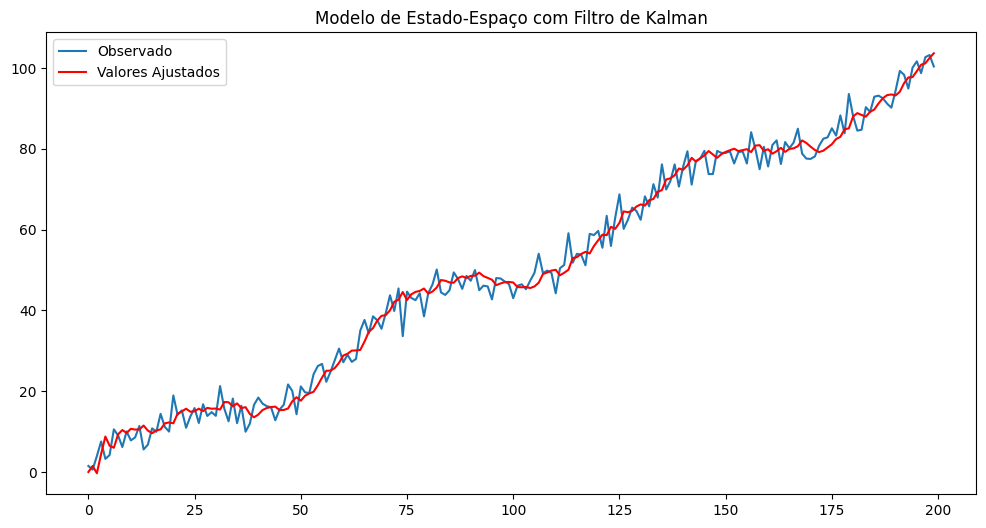

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(t, y, label='Observado')
plt.plot(t, result.fittedvalues, label='Valores Ajustados', color='red')
plt.legend()
plt.title('Modelo de Estado-Espaço com Filtro de Kalman')
plt.show()